# Data Science From Scratch

## Chapter -1 Introduction

In [1]:
users = [
{ "id": 0, "name": "Hero" },
{ "id": 1, "name": "Dunn" },
{ "id": 2, "name": "Sue" },
{ "id": 3, "name": "Chi" },
{ "id": 4, "name": "Thor" },
{ "id": 5, "name": "Clive" },
{ "id": 6, "name": "Hicks" },
{ "id": 7, "name": "Devin" },
{ "id": 8, "name": "Kate" },
{ "id": 9, "name": "Klein" }
]

In [2]:
users[0]["id"]

0

In [3]:
users

[{'id': 0, 'name': 'Hero'},
 {'id': 1, 'name': 'Dunn'},
 {'id': 2, 'name': 'Sue'},
 {'id': 3, 'name': 'Chi'},
 {'id': 4, 'name': 'Thor'},
 {'id': 5, 'name': 'Clive'},
 {'id': 6, 'name': 'Hicks'},
 {'id': 7, 'name': 'Devin'},
 {'id': 8, 'name': 'Kate'},
 {'id': 9, 'name': 'Klein'}]

In [4]:
friendship_pairs = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
(4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

In [5]:
friendship_pairs


[(0, 1),
 (0, 2),
 (1, 2),
 (1, 3),
 (2, 3),
 (3, 4),
 (4, 5),
 (5, 6),
 (5, 7),
 (6, 8),
 (7, 8),
 (8, 9)]

In [6]:
#Initialize the dict with an empty list for each user id

friendships  = {user['id']:[] for user in users}
friendships

{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}

In [7]:
for i, j  in friendship_pairs:
    friendships[i].append(j)
    friendships[j].append(i)

In [8]:
friendships

{0: [1, 2],
 1: [0, 2, 3],
 2: [0, 1, 3],
 3: [1, 2, 4],
 4: [3, 5],
 5: [4, 6, 7],
 6: [5, 8],
 7: [5, 8],
 8: [6, 7, 9],
 9: [8]}

In [9]:
def number_of_friends(user):
    """
    How many friends user have?
    """
    user_id = user["id"]
    friend_ids = friendships[user_id]
    return len(friend_ids)


In [10]:
total_connection =sum(number_of_friends(user) for user in users)
total_connection

24

In [11]:
num_uses = len(users)
avg_connection = total_connection/num_uses
avg_connection

2.4

In [12]:
num_friends_by_user_id = [(user["id"], number_of_friends(user)) for user in users]
num_friends_by_user_id

[(0, 2),
 (1, 3),
 (2, 3),
 (3, 3),
 (4, 2),
 (5, 3),
 (6, 2),
 (7, 2),
 (8, 3),
 (9, 1)]

In [13]:
#Sorting

num_friends_by_user_id.sort(key = lambda id_and_friends: id_and_friends[1], 
                           reverse=True)
num_friends_by_user_id

[(1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (8, 3),
 (0, 2),
 (4, 2),
 (6, 2),
 (7, 2),
 (9, 1)]

In [14]:
def foaf_ids_bad(user):
    
    return [foaf_id
        for friend_id in friendships[user["id"]]
        for foaf_id in friendships[friend_id]
    ]

In [15]:
foaf_ids_bad(users[0])

[0, 2, 3, 0, 1, 3]

In [16]:
from collections import Counter

def friends_of_friends(user):
    user_id = user["id"]
    return Counter(
        foaf_id 
        for friend_id in friendships[user_id]
        for foaf_id in friendships[friend_id]
        if foaf_id != user_id
        and foaf_id not in friendships[user_id]
    )

In [17]:
print(friends_of_friends(users[3]))

Counter({0: 2, 5: 1})


In [18]:
interests = [
(0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
(0, "Spark"), (0, "Storm"), (0, "Cassandra"),
(1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
(1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
(2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
(3, "statistics"), (3, "regression"), (3, "probability"),
(4, "machine learning"), (4, "regression"), (4, "decision trees"),
(4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
(5, "Haskell"), (5, "programming languages"), (6, "statistics"),
(6, "probability"), (6, "mathematics"), (6, "theory"),
(7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
(7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
(8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
(9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

In [19]:
def data_scientish_who_likes(target_interest):
    """find user id of similar interest"""
    return [user_id
        for user_id, user_interest in interests
        if user_interest == target_interest    
    ]


In [20]:
from collections import defaultdict

user_ids_by_interest = defaultdict(list)

for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)
    

In [21]:
# Interest to user ID
interest_by_user_id = defaultdict(list)

for user_id, interest in interests:
    interest_by_user_id[user_id].append(interest)

## Salries and Experience

In [22]:
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
(48000, 0.7), (76000, 6),
(69000, 6.5), (76000, 7.5),
(60000, 2.5), (83000, 10),
(48000, 1.9), (63000, 4.2)]

In [37]:
import pandas as pd
df = pd.DataFrame(salaries_and_tenures, columns=["salary","Experience"])
df

,salary,Experience
0,83000,8.7
1,88000,8.1
2,48000,0.7
3,76000,6.0
4,69000,6.5
5,76000,7.5
6,60000,2.5
7,83000,10.0
8,48000,1.9
9,63000,4.2


In [38]:
df.reset_index(drop=True, inplace=True)

In [40]:
df

,salary,Experience
0,83000,8.7
1,88000,8.1
2,48000,0.7
3,76000,6.0
4,69000,6.5
5,76000,7.5
6,60000,2.5
7,83000,10.0
8,48000,1.9
9,63000,4.2


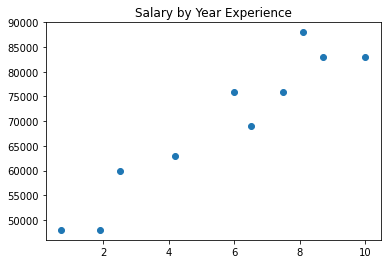

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
ax.scatter(df["Experience"], df["salary"])
ax.set_title("Salary by Year Experience");

In [49]:
words_and_counts = Counter(word
                          for user, interest in interests
                          for word in interest.lower().split())

In [50]:
for word, count in words_and_counts.most_common():
    if count>1:
        print(word, count)

big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
statistics 2
regression 2
probability 2
machine 2
neural 2
networks 2
